In [1]:
# DO NOT RUN THIS CELL MULTIPLE TIMES!
if "is_run" not in locals():
    #!ls
    %cd ..
    import os
    import sys
    from pathlib import Path
    import json
    import numpy as np
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem import PandasTools
    from rdkit.Chem import Descriptors
    from rdkit import DataStructs
    from rdkit.Chem.rdmolfiles import MaeMolSupplier
    from rdkit.Chem import Draw

    # from rdkit.Chem.Draw import rdDepictor
    from rdkit.Chem.Draw import IPythonConsole
    from rdkit import rdBase
    from rdkit import RDConfig

    # from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole

    IPythonConsole.ipython_useSVG = (
        True  # < set this to False if you want PNGs instead of SVGs
    )
    # dir(IPythonConsole)
    IPythonConsole.molSize = (900, 300)  # (450, 150)
    IPythonConsole.drawOptions.addStereoAnnotation = True
    IPythonConsole.drawOptions.annotationFontScale = 1.5
    # IPythonConsole.drawOptions.minFontSize=15
    # sys.path.append('../')
    sys.path.append("./libs")
    import src.noe
    from PepLibGen.StructGen import StructGen as sg

    # Which rdkit version?
    # print(rdBase.rdkitVersion)
    is_run = True
    from src.utils import dotdict

/biggin/b147/univ4859/research/03_macroconf/workflow


### Compound 1

id Macroconf-v2 excel file: 1_2

reference no: 1

name of the structure (number) in the reference: phepropeptin C

In [2]:
index = "1_2"
with open(f"./data/interim/refactor-test/{index}/data.json", "r") as f:
    compound = json.load(f)

compound = dotdict(compound)
compound.keys()

dict_keys(['index', 'solvent', 'seq_length', 'bonds', 'sequence', 'sequence_1', 'natural_cyclic_peptide', 'non_natural_cyclic_peptide', 'smile'])

In [3]:
compound.sequence_1

'LfPLlI'

In [4]:
pdb_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.pdb"
)
mol_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.mol2"
)

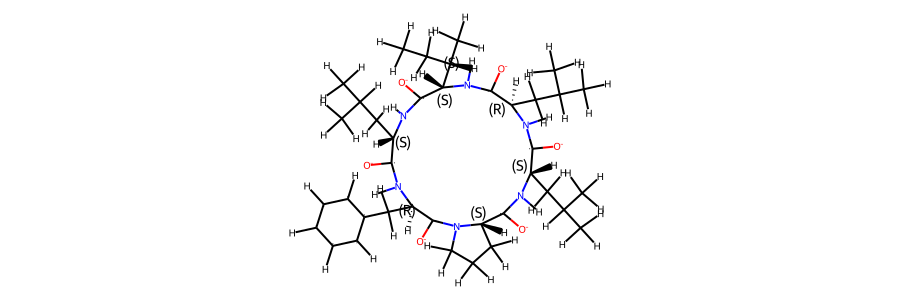

In [5]:
# Read in pdb file from amber
# mol_ref = Chem.MolFromPDBFile(pdb_amber, removeHs=False, proximityBonding=True) #removeHs=True, proximityBonding=True)
mol_ref = Chem.MolFromMol2File(
    mol_amber,
    removeHs=False,
)
mol_ref.RemoveAllConformers()
mol_ref

In [6]:
mol_ref.GetNumAtoms()

110

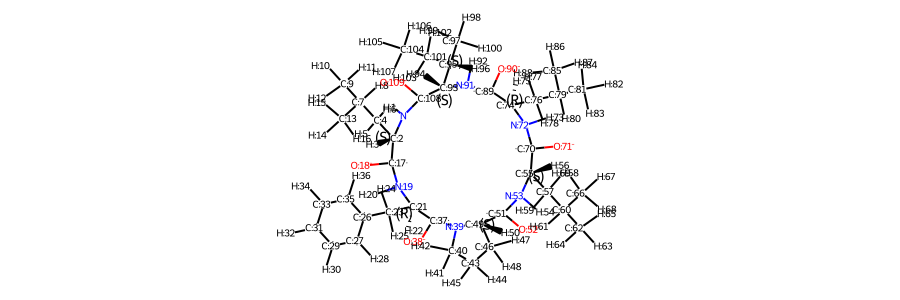

In [7]:
src.utils.mol_with_atom_index(mol_ref)

In [8]:
# Now the NOE assignment starts. Follow the instructions when running the below cells.
# Need to provide a csv file with the NOEs from the paper. The first two colums must be atom names, further columns
# should contain distances. The format can be specified below in the `style` variable:
# `D`: distance, `A`: mAximum, `I`: mInimum, `-`: do not use column/does not exist.
# Also provide a scaling factor, s.t the NOEs are converted to Angstrom. (e.g. 0.01 for pm -> Angstrom)

In [9]:
hist = {
    "11": [19],
    "13": [27, 35],
    "19*": [23],
    "2": [2],
    "22": [49],
    "24": [43],
    "25": [40],
    "25*": [40],
    "27": [55],
    "29": [53],
    "35": [74],
    "37": [72],
    "4": [0],
    "44": [91],
    "49": [95],
    "50": [93],
    "9": [21],
}
style = "D"
scaling = 1
# what seems off: Tyr2:CG?? Phe7(CG)

In [10]:
csv = "./data/external/raw_noes/1_2_1_phepropetin.csv"
# Run this line for initial NOE assignment. Use the figure with atom numbers
# above to match the queried atom names.
# NOE_auto, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)

# Run this line to re-run the NOE assignment with the hist object above.
# The hist object needs to be copied after execution of the line above, and
# replace the hist variable in the cell above.
NOE_auto, *_ = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

NOE dataframe:
      Atom 1    Atom 2  NMR exp  lower bound  upper bound
0      (73,)     (56,)     2.38            0            0
1      (73,)      (1,)     4.24            0            0
2      (73,)     (54,)     3.31            0            0
3      (92,)     (75,)     2.17            0            0
4      (20,)     (54,)     3.74            0            0
5      (20,)      (3,)     2.40            0            0
6      (20,)  (24, 25)     2.71            0            0
7       (1,)     (54,)     4.19            0            0
8       (1,)     (94,)     3.57            0            0
9       (1,)     (75,)     4.04            0            0
10      (1,)     (96,)     3.65            0            0
11  (28, 36)  (41, 42)     4.42            0            0
12     (54,)  (44, 45)     3.42            0            0
13     (54,)     (50,)     3.77            0            0
14     (54,)  (41, 42)     3.05            0            0
15     (22,)  (41, 42)     2.23            0            0

In [11]:
NOE_output = {f"{index}": NOE_auto}
# save as .json file
with open(f"./data/interim/refactor-test/{index}/NOE.json", "w") as f:
    json.dump(NOE_output, f)